# BACKGROUND 
A Company ZIMTECH has reached out to us for a simple data management project.


They have an excel sheet where their sales representative enters information of their opportunities, some of the information captured in the sheet includes the sales rep’s name, the product, the amount, date, year, closure status, etc.

##### The list below outlines their expectations.

1.   Dates should be captured in this format YYYY-MM-DD for all the date columns in the data given.

2.   Some columns should be captured as category

##### Also, ZIMTECH will like to have answers to the following questions still from their opportunity data.

1.   The product category with the highest opportunity value for 2019

2.   The KAM with the highest opportunity value for 2020

3.   The bestselling product in 2019

4.   The month with the best sale in 2020

###### Note that ZIMTECH will like us to recommend the best product category to focus more on in terms of marketing.

# EXPLORATORY DATA ANALYSIS

#### IMPORT DATA INTO PANDAS DATAFRAME

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [42]:
alitech = pd.read_csv(r"C:\Users\Akunna Anyamkpa\iCloudDrive\Layer3 Zip\PROJECT - ZimTech\zimtech-opportunity-data-updated.csv")

In [43]:
alitech.shape

(687, 13)

In [44]:
alitech.head(4)

,Product Category,KAM,NRC(one-off),New Value (=N=),Sales Stage,Unnamed: 5,Closure Status,Expected Closure Date (mm/dd/yyyy),Actual Closure Date,Commitment Month(original first commit),Date Added,Months closed(actual closure),YEAR
0,Network Infrastructure,KAM-A,"37,567,134.99",37567134.99,Negotiation/bidding,NaN,Cold,03/01/2019,NaN,Mar,2019,NaN,2019.0
1,Network Infrastructure,KAM-A,NaN,0.00,Proposal,NaN,Cold,10/04/2019,NaN,Oct,2019,NaN,2019.0
2,Network Infrastructure,KAM-A,"4,866,000.00",4866000.00,Proposal,NaN,Warm,10/05/2019,NaN,Oct,2019,NaN,2019.0
3,Network Infrastructure,KAM-A,"1,776,390.58",1776390.58,Close Won/Approval,NaN,Hot,10/05/2019,10/06/2019,Oct,2019,Oct,2019.0


In [45]:
alitech.columns

Index(['Product Category', 'KAM', 'NRC(one-off)', 'New Value (=N=)',
       'Sales Stage', 'Unnamed: 5', 'Closure Status',
       'Expected Closure Date (mm/dd/yyyy) ', 'Actual Closure Date',
       'Commitment Month(original first commit)', 'Date Added',
       'Months closed(actual closure)', 'YEAR'],
      dtype='object')

#### Rename Columns That Have Brackets And Symbols

In [46]:
alitech.columns = ['Product_Category', 'KAM', 'NRC_one_off', 'New_Value',
       'Sales_Stage', 'Nan', 'Closure_Status',
       'Expected_Closure_Date', 'Actual_Closure_Date',
       'Commitment_Month_original_first_commit', 'Date_Added',
       'Months_closed_actual_closure', 'YEAR']  

#### Drop Unnamed Columns

In [47]:
alitech.drop('Nan', axis='columns', inplace=True) #Dropping the Unnamed column

In [48]:
alitech.head(4)

,Product_Category,KAM,NRC_one_off,New_Value,Sales_Stage,Closure_Status,Expected_Closure_Date,Actual_Closure_Date,Commitment_Month_original_first_commit,Date_Added,Months_closed_actual_closure,YEAR
0,Network Infrastructure,KAM-A,"37,567,134.99",37567134.99,Negotiation/bidding,Cold,03/01/2019,NaN,Mar,2019,NaN,2019.0
1,Network Infrastructure,KAM-A,NaN,0.00,Proposal,Cold,10/04/2019,NaN,Oct,2019,NaN,2019.0
2,Network Infrastructure,KAM-A,"4,866,000.00",4866000.00,Proposal,Warm,10/05/2019,NaN,Oct,2019,NaN,2019.0
3,Network Infrastructure,KAM-A,"1,776,390.58",1776390.58,Close Won/Approval,Hot,10/05/2019,10/06/2019,Oct,2019,Oct,2019.0


#### Analyse The Quantitative Variables In The Dataset

In [49]:
alitech.describe()

,New_Value,YEAR
count,4.640000e+02,464.000000
mean,2.871997e+07,2019.622845
std,1.013352e+08,0.485197
min,0.000000e+00,2019.000000
25%,1.491289e+06,2019.000000
50%,3.822202e+06,2020.000000
75%,1.213377e+07,2020.000000
max,1.166108e+09,2020.000000


#### Check Datatypes 

In [50]:
alitech.dtypes

Product_Category                           object
KAM                                        object
NRC_one_off                                object
New_Value                                 float64
Sales_Stage                                object
Closure_Status                             object
Expected_Closure_Date                      object
Actual_Closure_Date                        object
Commitment_Month_original_first_commit     object
Date_Added                                 object
Months_closed_actual_closure               object
YEAR                                      float64
dtype: object

#### Convert Datatypes To Appropriate Format

In [51]:
alitech.Expected_Closure_Date = alitech.Expected_Closure_Date.astype('datetime64')#Converting Date to YYYY-MM-DD format
alitech.Actual_Closure_Date = alitech.Actual_Closure_Date.astype('datetime64')#Converting Date to YYYY-MM-DD format
alitech.Date_Added = alitech.Date_Added.astype('datetime64')#Converting Date to YYYY-MM-DD format
alitech.NRC_one_off = alitech.NRC_one_off.astype('category')#Converting to category
alitech.YEAR = alitech.YEAR.astype('category')#Converting Date to category

In [52]:
alitech.dtypes

Product_Category                                  object
KAM                                               object
NRC_one_off                                     category
New_Value                                        float64
Sales_Stage                                       object
Closure_Status                                    object
Expected_Closure_Date                     datetime64[ns]
Actual_Closure_Date                       datetime64[ns]
Commitment_Month_original_first_commit            object
Date_Added                                datetime64[ns]
Months_closed_actual_closure                      object
YEAR                                            category
dtype: object

### THE PRODUCT CATEGORY WITH THE HIGHEST OPPORTUNITY VALUE FOR 2019

In [53]:
alitech_2019 = alitech.loc[alitech['YEAR'] == 2019] #Creating a new data frame to store data for year 2019

In [54]:
display(alitech_2019.tail(4))

,Product_Category,KAM,NRC_one_off,New_Value,Sales_Stage,Closure_Status,Expected_Closure_Date,Actual_Closure_Date,Commitment_Month_original_first_commit,Date_Added,Months_closed_actual_closure,YEAR
171,Managed Services,KAM-B,NaN,4800000.0,Proposal,Warm,2020-01-30,2020-01-30,Jan,2019-12-26,Jan,2019.0
172,Access Services,KAM-B,"600,000.00",2616000.0,Proposal,Warm,2020-01-30,2020-01-30,Jan,2019-12-26,Jan,2019.0
173,Access Services,KAM-A,"300,000.00",2700000.0,Close Won/Approval,Hot,2019-12-20,2019-12-27,Dec,2019-12-30,Dec,2019.0
221,Managed Services,KAM-C,"1,588,549.80",1588549.8,Close Won/Approval,Hot,2019-12-31,2020-02-07,Dec,2020-02-07,Feb,2019.0


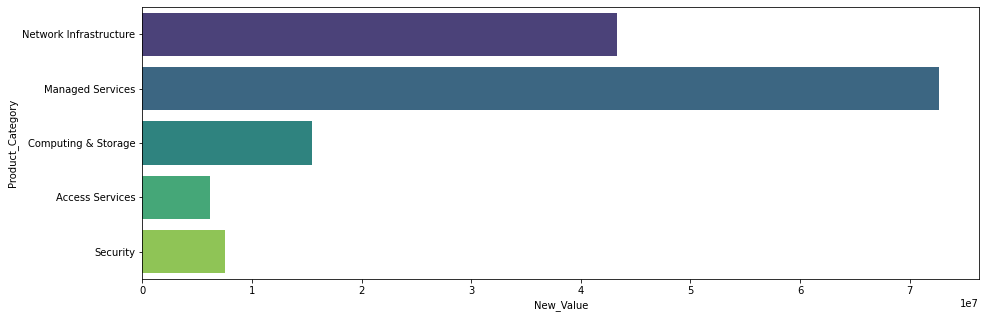

In [55]:
plt.figure(figsize = (15,5)) # To resize the plot

sns.barplot(x="New_Value", y="Product_Category", data=alitech_2019.sort_values("New_Value", ascending=False),
            label="Total Production", palette='viridis', ci=None)
plt.show()


### THE KAM WITH THE HIGHEST OPPORTUNITY VALUE FOR 2020



In [56]:
alitech_2020 = alitech.loc[alitech['YEAR'] == 2020] #Creating a new data frame to store data for year 2019
display(alitech_2020.tail(4))

,Product_Category,KAM,NRC_one_off,New_Value,Sales_Stage,Closure_Status,Expected_Closure_Date,Actual_Closure_Date,Commitment_Month_original_first_commit,Date_Added,Months_closed_actual_closure,YEAR
513,Cloud,KAM-C,"285,840,088.40",285840088.4,Close Won/Approval,Hot,2020-12-31,2020-12-21,Feb,2021-02-24,Dec,2020.0
514,Access Services,KAM-C,"317,127.00",1763502.0,Close Won/Approval,Hot,2020-10-31,2020-10-13,Oct,2021-02-24,Oct,2020.0
515,Access Services,KAM-C,"425,000.00",1788249.6,Close Won/Approval,Hot,2020-06-30,2020-06-11,Jun,2021-02-24,Jun,2020.0
516,Network Infrastructure,KAM-C,"202,250.00",202250.0,Close Won/Approval,Hot,2020-07-31,2020-07-27,Jul,2021-02-24,Jul,2020.0


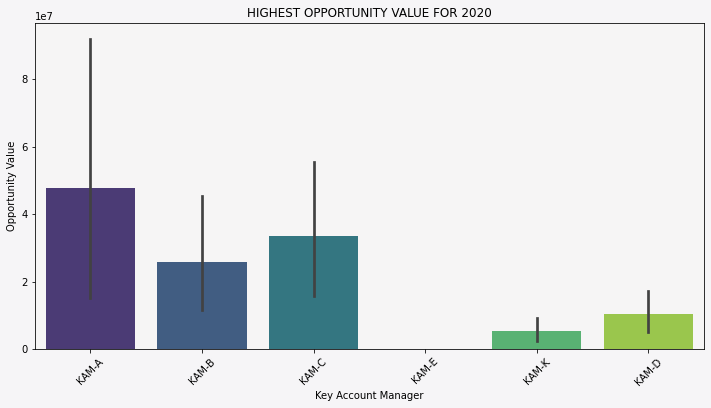

In [57]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')

plt_1= sns.barplot(y= 'New_Value',x='KAM', data=alitech_2020, palette='viridis')
plt_1.set_title('HIGHEST OPPORTUNITY VALUE FOR 2020')
plt_1.set_xlabel('Key Account Manager')
plt_1.set_ylabel('Opportunity Value')
plt_1.set_xticklabels(plt_1.get_xticklabels(), rotation=45);

### THE BESTSELLING PRODUCT IN 2019


In [58]:
alitech_2019.count() #Counts the values of different columns

Product_Category                          173
KAM                                       174
NRC_one_off                               150
New_Value                                 175
Sales_Stage                               174
Closure_Status                            170
Expected_Closure_Date                     140
Actual_Closure_Date                       117
Commitment_Month_original_first_commit    140
Date_Added                                175
Months_closed_actual_closure              117
YEAR                                      175
dtype: int64

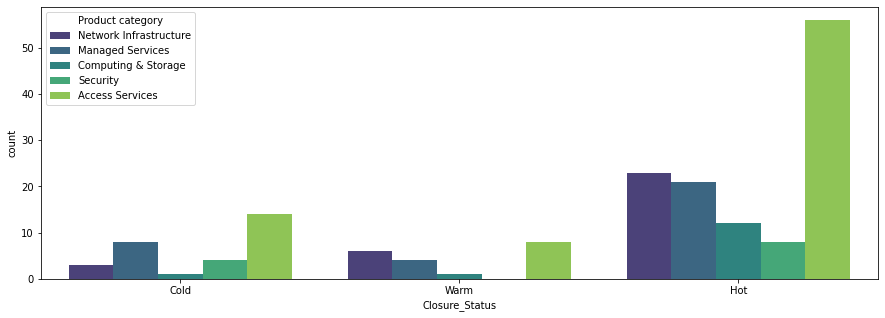

In [59]:
plt.figure(figsize = (15,5)) # To resize the plot
sns.countplot(x='Closure_Status', hue = 'Product_Category',palette='viridis', data=alitech_2019)
plt.legend(loc='upper left', title='Product category')

In [60]:
alitech_2019['Closure_Status'].value_counts()

Hot     121
Cold     30
Warm     19
Name: Closure_Status, dtype: int64

### THE MONTH WITH THE BEST SALE IN 2020

In [61]:
alitech_stage_2020 = alitech_2020.loc[alitech['Sales_Stage'] == 'Close Won/Approval'] #Creating a new data frame to store data for year 2019

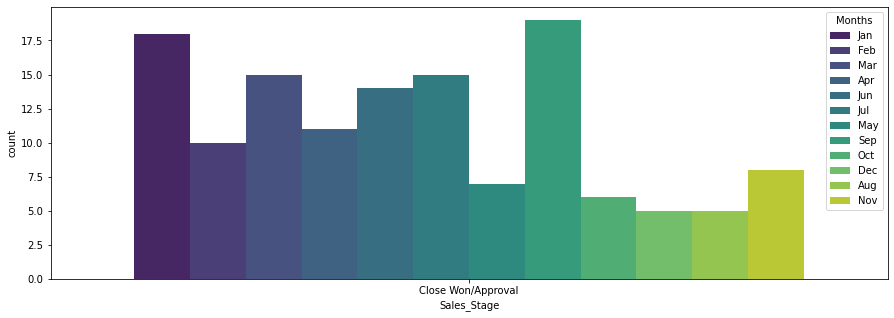

In [62]:
plt.figure(figsize = (15,5)) # To resize the plot
sns.countplot(x='Sales_Stage', hue = 'Commitment_Month_original_first_commit',palette='viridis', data=alitech_stage_2020)
plt.legend(loc='upper right', title='Months')

In [63]:
alitech_2020['Sales_Stage'].value_counts()

Close Won/Approval     133
Lost                    80
Proposal                53
Negotiation/bidding     19
Name: Sales_Stage, dtype: int64

In [64]:
alitech_2020['Commitment_Month_original_first_commit'].value_counts()

Mar    33
Oct    29
Apr    29
Sep    28
Dec    25
Jul    22
Jan    22
Nov    20
Feb    20
Jun    18
May    15
Aug     8
Name: Commitment_Month_original_first_commit, dtype: int64

### THE PRODUCT CATEGORY WITH THE HIGHEST OPPORTUNITY VALUE FROM 2019 TILL 2020

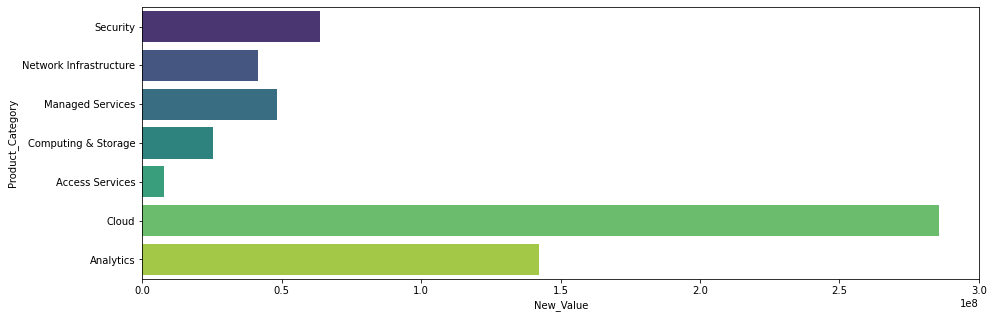

In [65]:
plt.figure(figsize = (15,5)) # To resize the plot

sns.barplot(x="New_Value", y="Product_Category", data=alitech.sort_values("New_Value", ascending=False),
            label="Total Production", palette='viridis', ci=None)
plt.show()

## RECOMMENDATION

#### The best product category to focus more on in terms of marketing is the Cloud category